# 서울시 공유자전거 '따릉이' 수요 예측 프로젝트
## 단계1. 데이터 전처리

## 0.프로젝트 소개

### (1) 수행 목표 
여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

#### 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

    * 1.데이터를 탐색하며 정보 획득
        * 날씨 데이터와 서울시 공유 자전거 따릉이의 수요 데이터를 제공해드렸습니다. 
        * 우리는 따릉이의 수요와 날씨간 어떤 연관성이 있는지 탐색 해 봅시다.
    * 2.EDA
        * 주어진 데이터의 변수들을 분석해 봅시다. 


### (2) 데이터 소개

#### 1) 기본 데이터

        * 학습데이터 : sbikedata.csv

#### 2) 데이터셋의 변수 소개

        * date : 날짜
        * hour : 시간
        * temperature : 온도
        * precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
        * windspeed : 풍속(평균)
        * humidity : 습도
        * visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
        * ozone : 오존 수치
        * PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
        * PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
        * count : 시간에 따른 따릉이 대여 수


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.

plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [3]:
file = 'sbikedata.csv'
seoul_bike = pd.read_csv(file, sep = ',', encoding = 'cp949')

In [4]:
def Check_Data_Basic(df, col):
    print('===' * 20)
    print(col,'의 구조 파악')
    display(df[col])
    print()
    print('===' * 20)
    print(col,'의 데이터 타입 파악')
    display(df[col].dtype)

# 데이터 결측치 파악
def Check_Nan(df, col):
    filter1 = df[col].isnull() == True
    filter2 = df[col] == ' ' 
    print('데이터 빈칸 확인')
    display(df[filter2])
    print()
    print('==='*20)
    print('데이터 NaN 확인')
    display(df[filter1])
    
# 데이터 분포 시각화 확인
def Check_Visual(df, col):
    fig, axe = plt.subplots(2,1, figsize = (9,6),  height_ratios=[.2, .8], layout = 'constrained')
    sns.boxplot(data = df, x = col, ax = axe[0])
    sns.histplot(data = df, x = col, kde = True, ax = axe[1])
    title_font = {'fontsize': 15, 'fontweight': 'bold'}
    axe[0].set_title(col + '이상치 확인', title_font)
    axe[1].set_title(col + '분포 확인', title_font)

In [8]:
def Check_BS(df, col_X, col_Y):
    arrow = {'arrowstyle': '->', 'facecolor' : 'black'}
    fig, axe = plt.subplots(figsize = (7,5), layout = 'constrained')
    sns.barplot(data = df, x = col_X, y = col_Y, ax = axe)
    title_font = {'fontsize': 15, 'fontweight': 'bold'}
    axe.set_title(col_X + '와' + col_Y+ '의 상관 비교', title_font)
    
def Check_SS(df, col_X, col_Y, color):
    arrow = {'arrowstyle': '->', 'facecolor' : 'black'}
    fig, axe = plt.subplots(figsize = (8,5), layout = 'constrained')
    axe.scatter(data = df, x = col_X, y = col_Y, c = color, alpha=0.1, cmap='Spectral')
    title_font = {'fontsize': 15, 'fontweight': 'bold'}
    axe.set_title(col_X + '와' + col_Y+ '의 상관 비교', title_font)
    return axe

# **가설 1 : 강우 여부와 따릉이 대여량 간에 관련이 있다.**

## **1. 데이터 확인 및 전치리**

In [5]:
Check_Nan(seoul_bike, 'hour')

데이터 빈칸 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count



데이터 NaN 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


## **2. 단변량 분석**

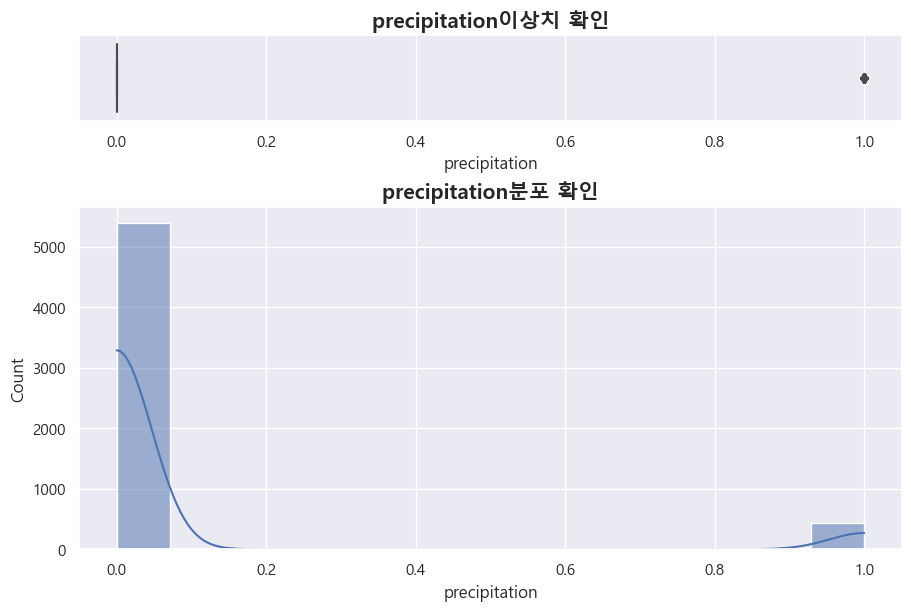

In [7]:
Check_Visual(seoul_bike, 'precipitation')

## **3. 이변량 분석**

In [10]:
temp = seoul_bike.loc[seoul_bike['count'].notnull()]

yes = temp.loc[temp['precipitation'] == 0, 'count']
no = temp.loc[temp['precipitation'] == 1, 'count']
pvalue = spst.ttest_ind(yes, no)[1]

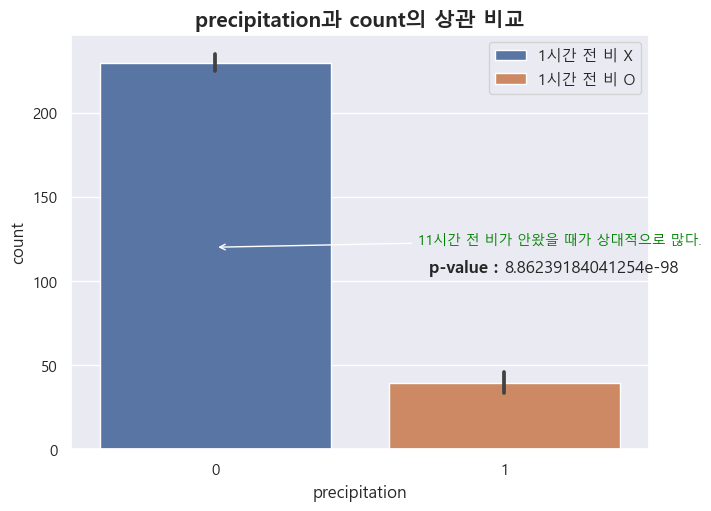

In [11]:
fig, axe = plt.subplots(figsize = (7,5),layout = 'constrained')
sns.barplot(data = seoul_bike, x = 'precipitation', y = 'count', label = ['1시간 전 비 X', '1시간 전 비 O'], ax = axe)
title_font = {'fontsize': 15, 'fontweight': 'bold'}
axe.set_title('precipitation과 count의 상관 비교', title_font)
axe.annotate(text= "11시간 전 비가 안왔을 때가 상대적으로 많다.",  # 입력할 텍스트
        xy=(0, 120),  # 시작점 위치
        xytext=(0.7, 122),  # 텍스트가 표시 될 위치
        color='green', fontstyle='normal', fontsize=10,
        arrowprops=dict(facecolor = 'black', arrowstyle = '->')
        )
axe.text(1, 105, "p-value : ", ha="right", weight="heavy")
axe.text(1, 105, spst.ttest_ind(yes, no)[1])
axe.legend()

# **가설 2 : 습도와 따릉이간에는 관계가 있다.**

## **1. 데이터 확인 및 전처리**

## **2. 단변량 분석**

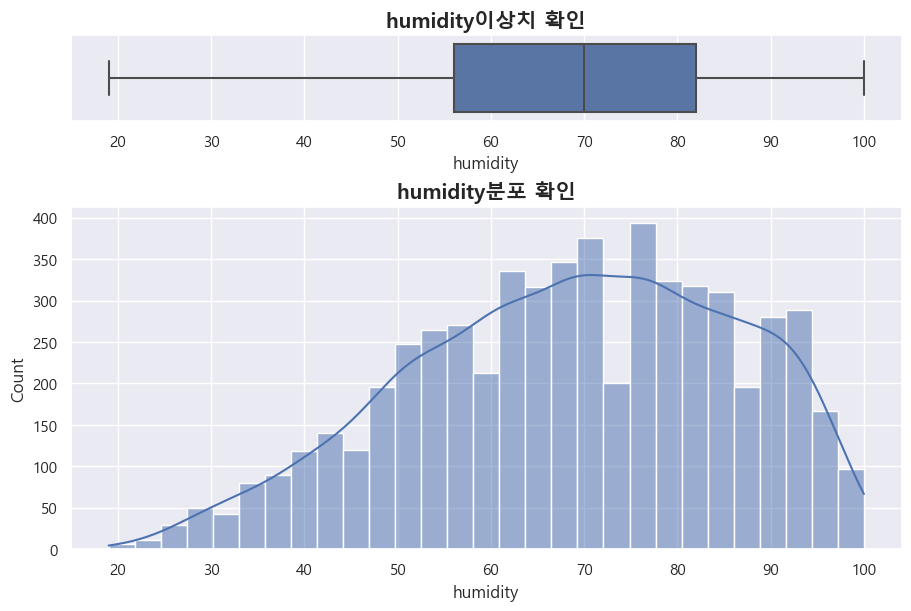

In [12]:
Check_Visual(seoul_bike, 'humidity')

## **3. 이변량 분석**

<Axes: xlabel='humidity', ylabel='count'>

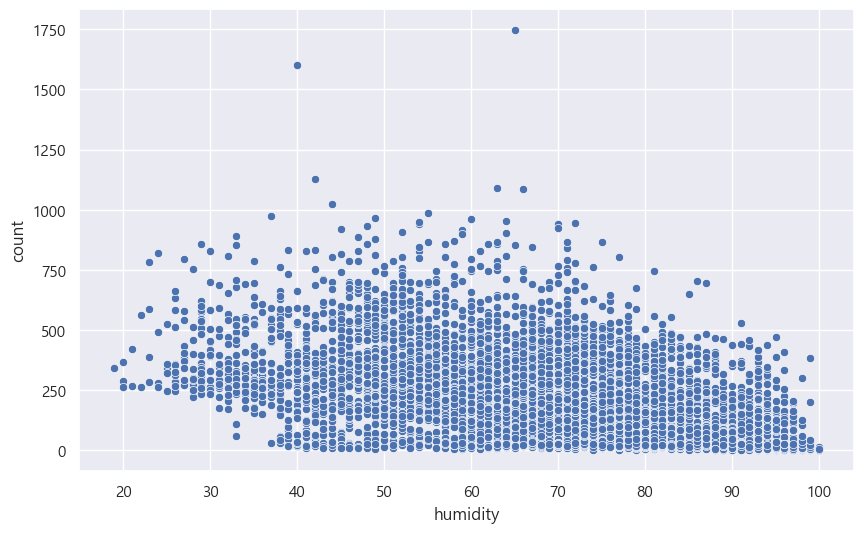

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='count', data=seoul_bike)

In [14]:
# 수치화
spst.pearsonr(seoul_bike['humidity'],seoul_bike['count'])

PearsonRResult(statistic=-0.4789554265904137, pvalue=0.0)

In [ ]:
# 수치화
spst.pearsonr(seoul_bike['temperature'],seoul_bike['count'])

# **가설 3 : 온도와 따릉이간에는 관계가 있다.**

## **1. 데이터 확인 및 전처리**

## **2. 단변량 분석**

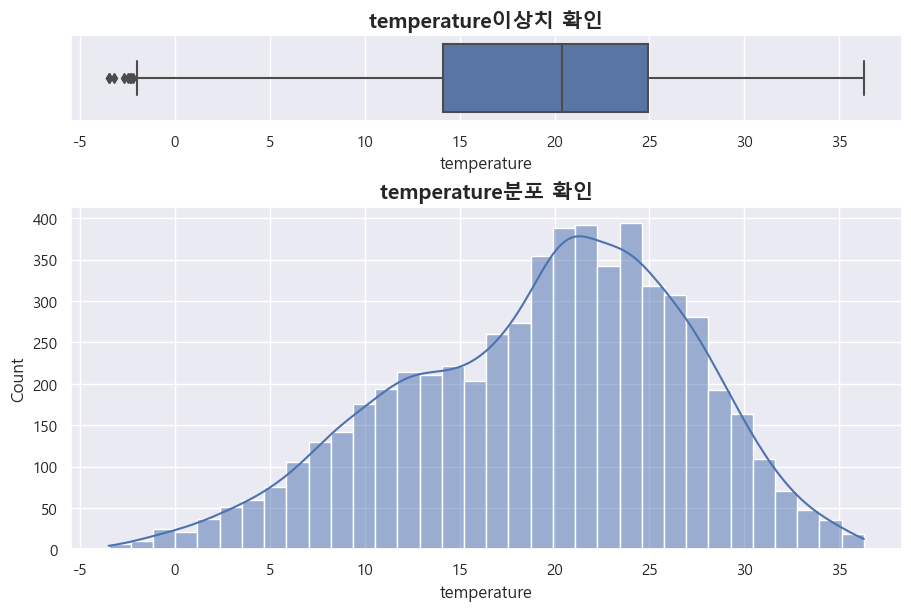

In [16]:
Check_Visual(seoul_bike, 'temperature')

## **3. 이변량 분석**

<Axes: xlabel='temperature', ylabel='count'>

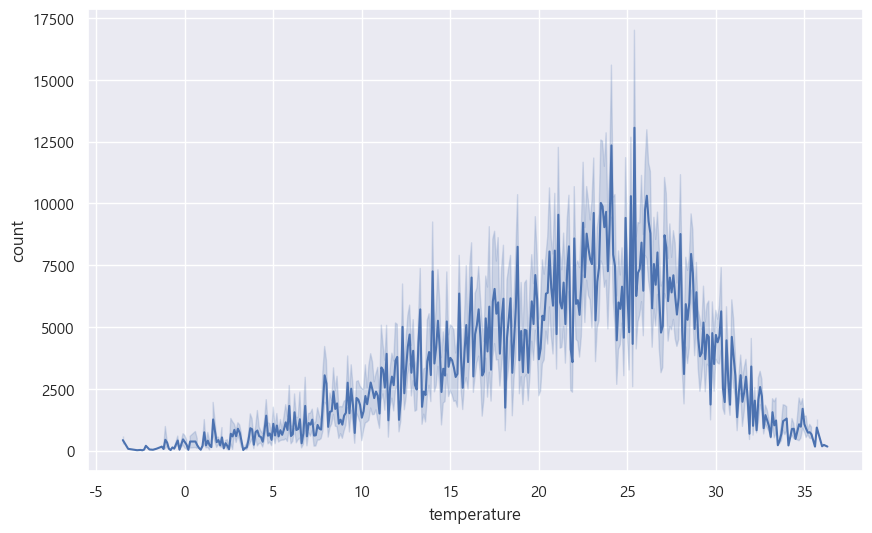

In [15]:
# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x='temperature', y='count', data=seoul_bike, estimator=np.sum)

In [17]:
# 수치화
spst.pearsonr(seoul_bike['temperature'],seoul_bike['count'])

PearsonRResult(statistic=0.2771692363089791, pvalue=2.940516555113978e-103)

# **가설 3-1 : 월별 평균 온도와 따릉이 간에는 관계가 있다.**

## **3-1-1. 이변량 분석**

<Axes: xlabel='month', ylabel='count'>

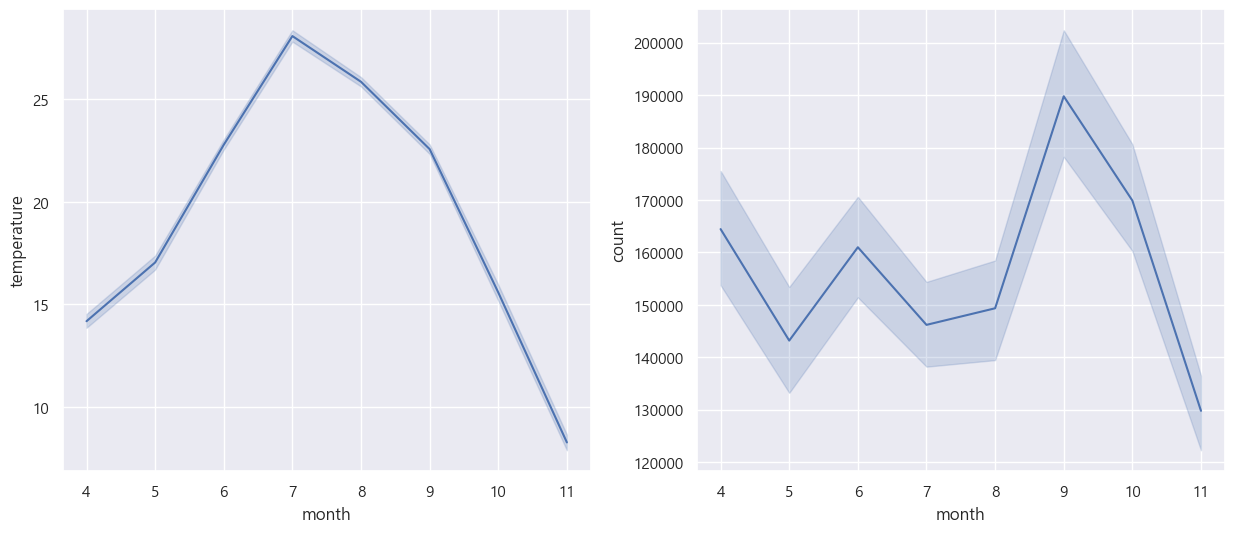

In [18]:
seoul_bike['date'] = pd.to_datetime(seoul_bike['date'])
seoul_bike['month'] = seoul_bike['date'].dt.month

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='month', y='temperature', data=seoul_bike)
plt.subplot(1, 2, 2)
sns.lineplot(x='month', y='count', data=seoul_bike, estimator=np.sum)

# **가설 3-2 : 불쾌지수와 따릉이 간에는 관계가 있다.**

## **3-2-1. 이변량 분석**

In [19]:
discomfort = []
for i in range(len(seoul_bike)):
    temperature = seoul_bike.iloc[i,5]
    humidity = seoul_bike.iloc[i,8]
    calc_discomfort = 9/5*temperature-0.55*(1-humidity/100)*(9/5*temperature-26)+32 # 불쾌지수 계산식
    discomfort.append(calc_discomfort)

new_series = pd.Series(discomfort)
seoul_bike['discomfort'] = new_series

bins = [0, 68, 75, 80, float('inf')]
labels = [0, 1, 2, 3]

seoul_bike['discomfort_C'] = pd.cut(seoul_bike['discomfort'], bins=bins, labels=labels, right=False)

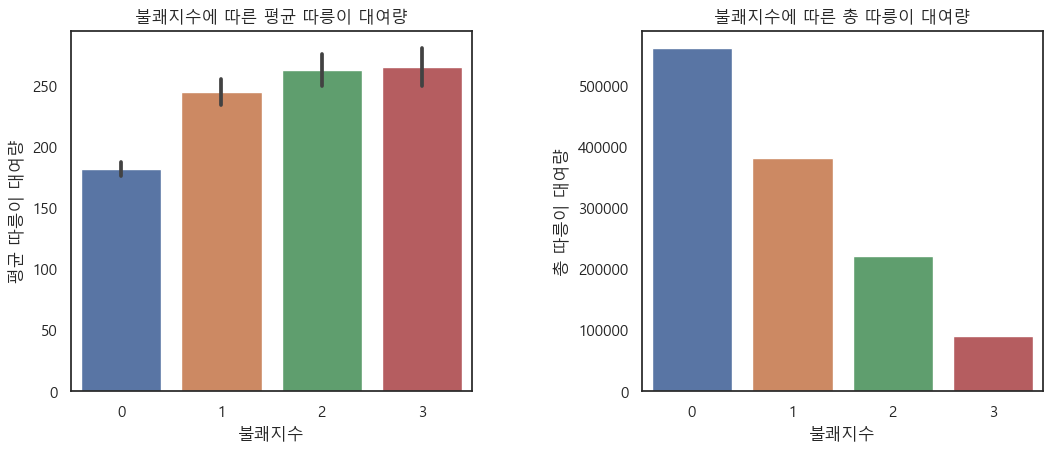

In [20]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='discomfort_C', y='count', data=seoul_bike)
plt.title('불쾌지수에 따른 평균 따릉이 대여량')
plt.xlabel('불쾌지수')
plt.ylabel('평균 따릉이 대여량')


plt.subplot(1, 2, 2)
grouped_df = seoul_bike.groupby('discomfort_C')['count'].sum().reset_index()
sns.barplot(x='discomfort_C', y='count', data=grouped_df, estimator=sum)
plt.title('불쾌지수에 따른 총 따릉이 대여량')
plt.xlabel('불쾌지수')
plt.ylabel('총 따릉이 대여량')

plt.tight_layout(pad=5)
plt.show()

# **가설 4 : 풍속과 따릉이 간에는 관계가 있다.**

## **2. 단변량 분석**

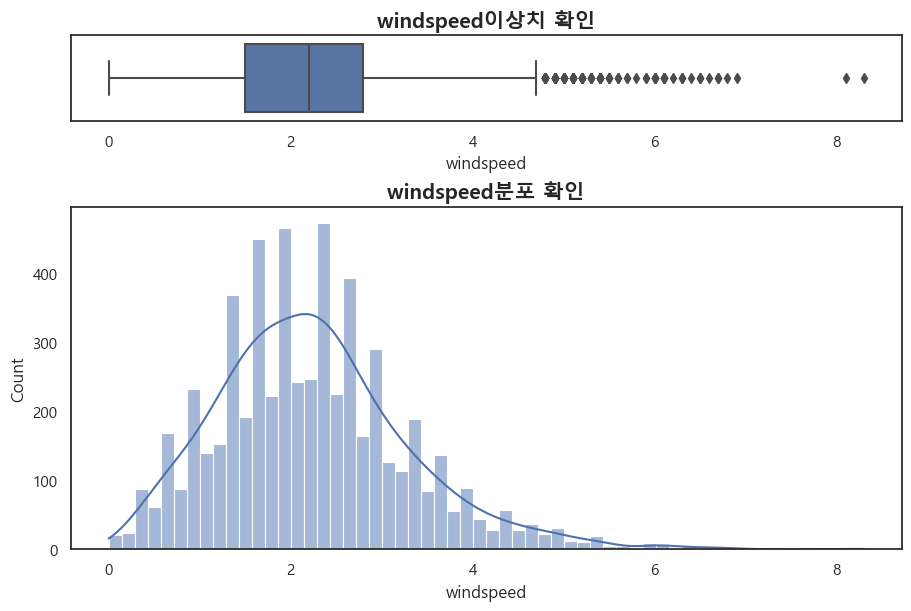

In [24]:
Check_Visual(seoul_bike, 'windspeed')

## **3. 이변량 분석**

<Axes: xlabel='windspeed', ylabel='count'>

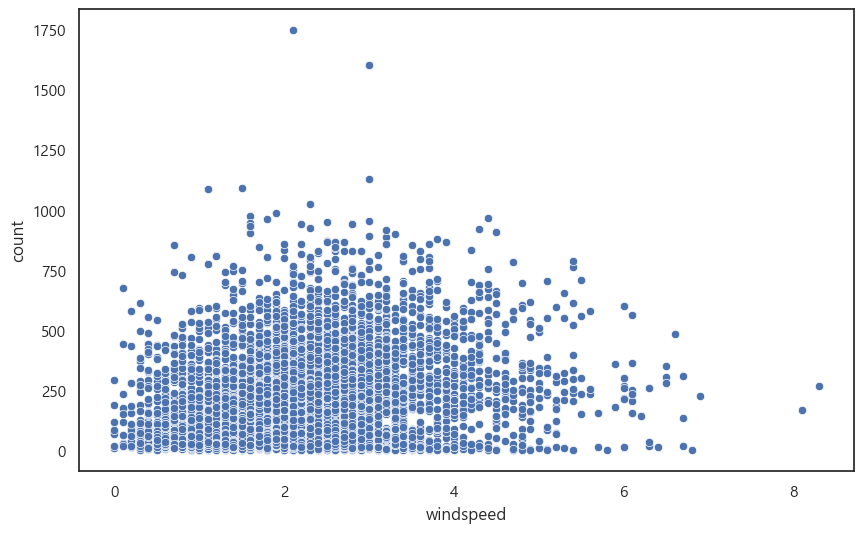

In [22]:
# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='count', data=seoul_bike)

In [23]:
# 수치화
spst.pearsonr(seoul_bike['windspeed'],seoul_bike['count'])

PearsonRResult(statistic=0.22372189900674888, pvalue=5.243317678213925e-67)

## 4. 가설 검정

### 1. 강한 관계의 변수 (대립가설 채택)
    - 강우 여부, 습도
### 2. 약한 관계의 변수
    - 시간, 온도, 풍속
### 3. 관계 없는 변수 (귀무가설 채택)
    - 가시거리, 오존, 미세먼지, 초미세먼지

## 5. Insight 도출

- 따릉이 대여량에 가장 큰 영향을 미치는 변수는 강수 여부, 습도로 나타났다.

- 날씨 조건(강수 여부, 습도)이 대여량에 미치는 영향은 크며, 이 정보를 활용하여 따릉이 수요를 예측하고 대여소 배치 등의 운영을 개선할 수 있을 것이다.

- 시간대에 따른 대여량의 증가는 출퇴근 시간 등 특정 시간대에 대여량이 집중되는 패턴이 있다는 것을 의미하므로, 해당 시간대에 대여량을 고려한 서비스 개선이 필요할 수 있다.

- 온도, 풍속, 시정, 오존 등은 상대적으로 약한 영향을 미치지만, 이러한 요소들도 고려하여 따릉이 이용 패턴을 예측하고 서비스를 최적화할 수 있다.